Use models taught in the module.  
You must use models taught in the module,
these are: perceptron, decision trees, linear regression, 
support vector machines, random forest, k-nearest neighbour,
naïve Bayes, neural networks as well as unsupervised techniques 
k-means and GMM, and principal component analysis
Most supervised models have both classification and regression variants. 
You are encouraged to work with neural networks.  
An additional technique from outside the taught module content might be applied 
for comparison purposes, if this is done it should be clearly indicated.



In [1]:
#import os
#for Heart_b in os.listdir("C:\Users\jeand\Downloads"):
    #print(Heart_b)

In [2]:
# to chec workingdirectory os.getcwd()


In [3]:
#to change directory os.chdir()

In [4]:
#pip install -U imbalanced-learn

In [5]:
#conda install -c conda-forge imbalanced-learn

In [6]:
import numpy as np 
import matplotlib as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, classification_report, confusion_matrix
from matplotlib import style
#support vector machines, random forest, k-nearest neighbour, naïve Bayes, neural networks 

os.chdir("C:\\Users\\jeand\\Downloads")

#path = "C:\Users\jeand\Downloads\heart_2020_cleaned.csv.zip"

#filename= os.path.join(path,"heart_2020_cleaned.csv")
Heart_b = pd.read_csv('heart_2020_cleaned.csv.zip')
#cwd= os.getcwd()
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

In [7]:
#Heart_b[:10].info

In [8]:
#cleaning up the data
#Heart_b= Heart_b.drop_duplicates()

In [9]:
Heart_b.head(30)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [10]:
#Heart_b.value_counts()

In [11]:
Heart_b.shape

(319795, 18)

In [12]:
Heart_b.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
Heart_b.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [14]:
Heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [15]:
Heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [16]:
Heart_b.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


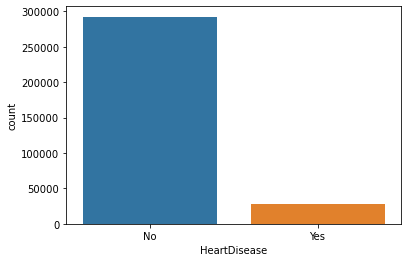

In [17]:
print(sns.countplot(Heart_b['HeartDisease']))

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\jeand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


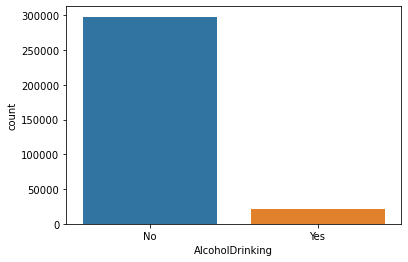

In [18]:
print(sns.countplot(Heart_b['AlcoholDrinking']))

# Visualise the distribution between each column and Heart disease column

fig, axes= plt.subplots(nrows=7, ncols=1, figsize=(12,20), sharey=False)
axes=  axes.ravel()
cols= ['AlcoholDrinking','MentalHealth','Diabetic','SkinCancer','Sex','SleepTime','PhysicalHealth']


for col, ax in zip(cols, axes):
    figure = Heart_b[[col]]
    sns.distplot( x=figure, ax=ax, kde =False)
    ax.set(title='Visualise the distribution between each column and Heart disease column:{col}')
fig.tight_layout()    
plt.show()

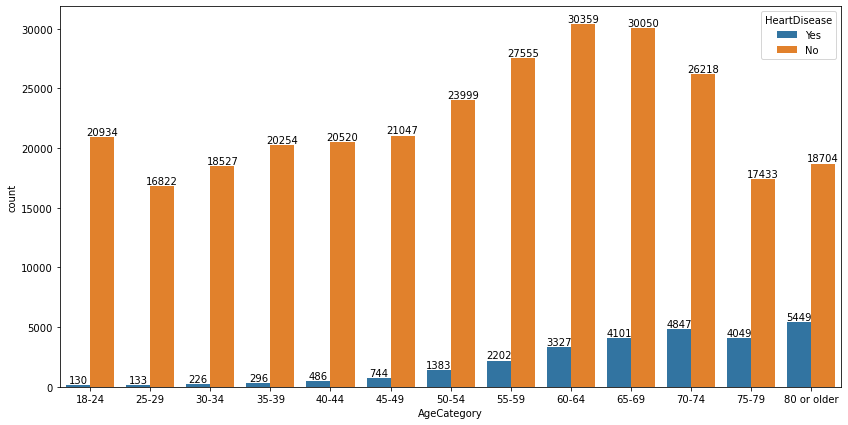

In [19]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x= Heart_b["AgeCategory"], hue=Heart_b["HeartDisease"], order=['18-24', '25-29', '30-34',  '35-39', '40-44', '45-49','50-54', 
                             '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], 
                    hue_order=['Yes','No'])
for b in ax1.patches:
    ax1.annotate(format(b.get_height(), '.0f'), (b.get_x()+ b.get_width()/2., b.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

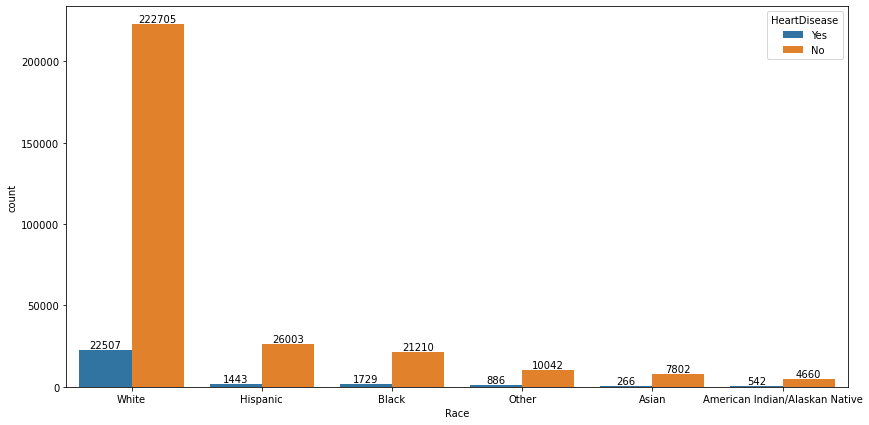

In [20]:
plt.figure(figsize=(14,7))
ax1 = sns.countplot(x= Heart_b["Race"], hue=Heart_b["HeartDisease"], order=Heart_b["Race"].value_counts().index, 
                    hue_order=['Yes','No'])
for b in ax1.patches:
    ax1.annotate(format(b.get_height(), '.0f'), (b.get_x()+ b.get_width()/2., b.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [21]:
Heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [22]:
#SNEHADRI,DUTTA (2022)HHeart Disease Prediction using AdaBoosting,Source code.https://www.kaggle.com/code/snehadridutta/heart-disease-prediction-using-adaboosting 
Heart_b.Smoking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Stroke.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Sex.replace(('Male','Female'), (1,0), inplace = True)
Heart_b.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
Heart_b.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (0,0,0,0,0,1,1,1,1,1,1,1,1), inplace = True)
Heart_b.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (5,4,3,2,1), inplace = True)
Heart_b.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Asthma.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.KidneyDisease.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.SkinCancer.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Race.replace(('White', 'Black', 'Asian', 'American Indian/Alaskan Native' ,'Other','Hispanic'),(0,1,1,1,0,1), inplace=True)

In [23]:
Heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

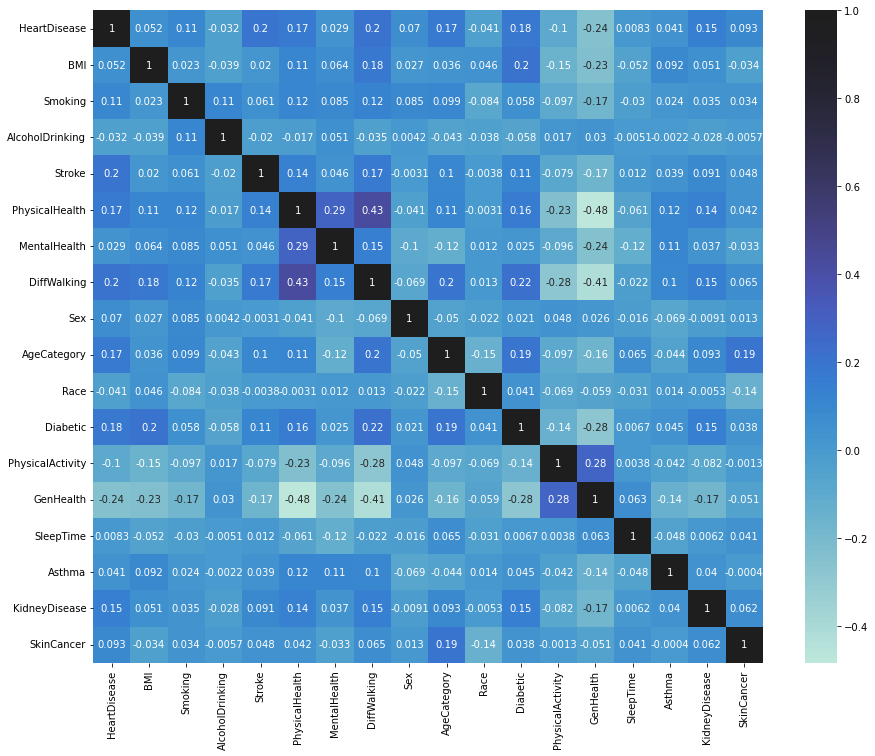

In [24]:
#Checking if there is any correlation

correlation_matrix= Heart_b.corr()
plt.figure(figsize = (15,12))
sns_plot=sns.heatmap(correlation_matrix,vmin=None, vmax=True, 
                     cmap=None, center=True, robust=False,annot=True)
plt.show()


In [25]:
#Splitting the data
X= Heart_b.drop(['HeartDisease','MentalHealth','Race'],axis=1).values
y=Heart_b['HeartDisease'].values
print(X.shape,y.shape)

(319795, 15) (319795,)


In [26]:
#pip install -U imbalanced-learn

In [27]:
#pip install -U imbalanced-learn

In [28]:


#X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state=100) 


#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 0)
#sm.fit(X_train,y_train)
#X_train, y_train = sm.fit_resample(X_train, y_train)
#print(X_train.shape,y_train.shape)

In [29]:
#lt.scatter(X[:, 0], X[:,100=y, s=50, cmap='RdBu')
#im = plt.axis()
#lt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
#lt.axis(lim);

In [30]:
#scaling the datasets/balancing
#from sklearn.preprocessing import StandardScaler

#StandardScaler=StandardScaler()

You must use models taught in the module, these are: perceptron, decision trees, linear regression, support vector machines, random forest, k-nearest neighbour, naïve Bayes, neural networks as well as unsupervised techniques k-means and GMM, and principal component analysis Most supervised models have both classification and regression variants. You are encouraged to work with neural networks.


X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state=100)

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, stratify=y)
y_train.value_counts().plot(kind='bar')

In [31]:
#Building model(Decisiontree)
from sklearn.metrics import precision_score, classification_report, confusion_matrix

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state=100)

Decision_tree= DecisionTreeClassifier(criterion ='entropy')
Decision_tree.fit(X_train,y_train)
y_pred= Decision_tree.predict(X_test)
Accuracy= accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classificationreport=classification_report(y_test,y_pred)

#ConfusionMatrix=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=variety)
print(X_test[:15])
print(y_test[:15])
print(y_pred[:15])
print('accuracy:%.2f'%accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test,y_pred))
plt.show()

[[24.41  0.    0.    0.    0.    0.    1.    0.    0.    1.    5.    7.
   0.    0.    0.  ]
 [43.85  0.    0.    0.    0.    0.    0.    0.    0.    1.    4.    6.
   0.    0.    0.  ]
 [26.61  0.    0.    0.    0.    0.    0.    1.    0.    1.    4.    6.
   0.    0.    0.  ]
 [23.24  0.    0.    0.    0.    0.    0.    1.    0.    0.    3.    8.
   0.    0.    0.  ]
 [27.78  1.    0.    0.    0.    0.    0.    1.    0.    1.    5.    8.
   0.    0.    0.  ]
 [30.54  1.    1.    0.    0.    0.    0.    1.    0.    1.    4.   10.
   0.    0.    0.  ]
 [21.03  0.    0.    0.    2.    0.    0.    0.    0.    1.    5.    7.
   0.    0.    0.  ]
 [25.85  1.    0.    0.    0.    0.    0.    0.    0.    1.    4.    5.
   0.    0.    0.  ]
 [31.32  0.    0.    0.    2.    0.    0.    0.    0.    1.    4.    3.
   0.    0.    0.  ]
 [30.68  0.    0.    0.   14.    0.    1.    1.    0.    1.    4.    6.
   0.    0.    0.  ]
 [24.28  0.    0.    0.    0.    0.    1.    1.    0.    1.    3.    8

In [32]:
#Build a K-Fold for Cross Validation(intro to AI ex2part2)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy:0.91
[[58019   407]
 [ 5155   378]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58426
           1       0.48      0.07      0.12      5533

    accuracy                           0.91     63959
   macro avg       0.70      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



Text(91.68, 0.5, 'true value')

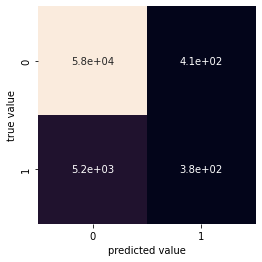

In [33]:
#Building model(RandomForestClassifier-CHECK Intro to AI EX5PART2)
Ranforest= RandomForestClassifier(n_estimators=10,max_depth=14).fit(X_train,y_train)
#Ranforest= RandomForestClassifier(n_estimators=10,criterion="entropy").fit(X_train,y_train)
y_pred=Ranforest.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cmrf = confusion_matrix(y_test,y_pred)
classificationreport=classification_report(y_test,y_pred)
#print(X_test[:15])
print(y_test[:15])
print(y_pred[:15])
print('accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(cmrf)
print(classification_report(y_test,y_pred))
sns.heatmap(cmrf, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

[[29.29  1.    0.    0.    0.    1.    0.    1.    0.    0.    3.    5.
   0.    0.    0.  ]]
[0]
[0]
accuracy:0.91
[[58147  5321]
 [  279   212]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     58426
           1       0.43      0.04      0.07      5533

    accuracy                           0.91     63959
   macro avg       0.67      0.52      0.51     63959
weighted avg       0.87      0.91      0.88     63959



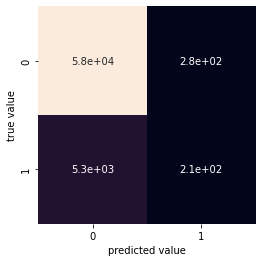

In [34]:
#Building Model(Knearest-neighbor classifier)
kNN= KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
y_pred= kNN.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cmKnn=confusion_matrix(y_test,y_pred)
print(X[14:15])
print(y_test[14:15])
print(y_pred[14:15])
print('accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(cmKnn.T)
print(classification_report(y_test,y_pred))
sns.heatmap(cmKnn, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [35]:
print(X_test[9], y_test[9])
print(kNN.predict([X_test[9]]))

[30.68  0.    0.    0.   14.    0.    1.    1.    0.    1.    4.    6.
  0.    0.    0.  ] 0
[0]


In [36]:
#plt.scatter(X[:, 1], X[:, 1], c=y, s=50, cmap='RdBu')

# Building the model with a scaled data set


In [37]:
os.chdir("C:\\Users\\jeand\\Downloads")

#path = "C:\Users\jeand\Downloads\heart_2020_cleaned.csv.zip"

#filename= os.path.join(path,"heart_2020_cleaned.csv")
Heart_b = pd.read_csv('heart_2020_cleaned.csv.zip')
#cwd= os.getcwd()
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

In [38]:
#SNEHADRI,DUTTA (2022)HHeart Disease Prediction using AdaBoosting,Source code.https://www.kaggle.com/code/snehadridutta/heart-disease-prediction-using-adaboosting 

Heart_b.Smoking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Stroke.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Sex.replace(('Male','Female'), (1,0), inplace = True)
Heart_b.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
Heart_b.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (0,0,0,0,0,1,1,1,1,1,1,1,1), inplace = True)
Heart_b.GenHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (5,4,3,2,1), inplace = True)
Heart_b.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Asthma.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.KidneyDisease.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.SkinCancer.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Race.replace(('White', 'Black', 'Asian', 'American Indian/Alaskan Native' ,'Other','Hispanic'),(0,1,1,1,0,1), inplace=True)


In [39]:
Heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [40]:
#Splitting the data
x= Heart_b.drop(['HeartDisease','MentalHealth'],axis=1).values
y=Heart_b['HeartDisease'].values
#print(X.shape,y.shape)


#split the data
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify = y )

#Scalling the data
scad= StandardScaler()
scad.fit(X_train)
X_train_std = scad.transform(X_train)
X_test_std = scad.transform(X_test)

#imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
sm.fit(X_train, y_train)
X_train, y_train= sm.fit_resample(X_train, y_train)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(409390, 15)
(95939, 15)
(409390,)
(95939,)


sm = SMOTE(random_state = 0)
sm.fit(X,y)
X_train, y_train= sm.fit_resample(X_train, y_train)


In [41]:
#X[0:30]

In [42]:
#X_train[0:30]

Accuracy:0.85
[[79737  6139]
 [ 7990  2073]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     87727
           1       0.21      0.25      0.23      8212

    accuracy                           0.85     95939
   macro avg       0.57      0.58      0.57     95939
weighted avg       0.87      0.85      0.86     95939



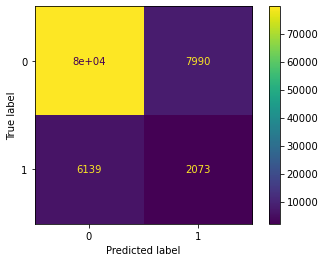

In [43]:
#DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model_Detree=DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
y_pred_Detree=model_Detree.predict(X_test)
Accuaracy = accuracy_score(y_test,y_pred_Detree)
cm_Detree= confusion_matrix(y_test,y_pred_Detree)

print('Accuracy:%.2f'%accuracy_score(y_test,y_pred_Detree))
      
print(cm_Detree.T)
print(classification_report(y_test,y_pred_Detree))
#sns.heatmap(cm_Detree, square=True, annot=True, cbar=False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Detree, display_labels=model_Detree.classes_)
disp.plot()
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0]
accuracy:0.87
[[82325  5402]
 [ 6744  1468]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     87727
           1       0.21      0.18      0.19      8212

    accuracy                           0.87     95939
   macro avg       0.57      0.56      0.56     95939
weighted avg       0.86      0.87      0.87     95939



Text(91.68, 0.5, 'true value')

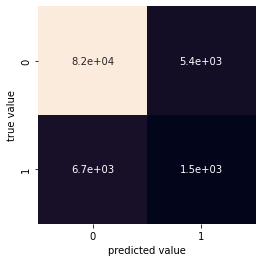

In [44]:

#Building model(RandomForestClassifier-CHECK Intro to AI EX5PART2)
#Ranforest= RandomForestClassifier(n_estimators=10,max_depth=14).fit(X_train,y_train)
Ranforest= RandomForestClassifier(n_estimators=10,criterion="entropy").fit(X_train,y_train)
y_pred=Ranforest.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cmrf = confusion_matrix(y_test,y_pred)
classificationreport=classification_report(y_test,y_pred)
#print(X_test[:15])
print(y_test[:15])
print(y_pred[:15])
print('accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(cmrf)
print(classification_report(y_test,y_pred))
sns.heatmap(cmrf, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')



#X_train, X_test,y_train,y_test= train_test_split(X,y , test_size=0.3, random_state=0)

style.use('fivethirtyeight')
figure= plt.figure(figsize=(12,10))

accuracy_data=[]
number=[]

for i in range(1,200):
    modelrand= RandomForestClassifier(n_estimators=i, criterion= 'entropy')
    modelrand.fit(X_train,y_train)
    y_pred_rand=modelrand.predict(X_test)
    classificationreport=classification_report(y_test,y_pred_rand)
    accuracy_data.append(accuracy)
    
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred_rand))
print(classificationreport)
plt.plot(number, accuracy_data)
plt.xlabel("number of Trees(n_estimators)")
plt.ylabel('accuracy')
plt.show()

In [45]:
#split the data
#X_train, X_test,y_train,y_test= train_test_split(X,y , test_size=0.35, random_state=0)

modelknn=KNeighborsClassifier()
modelknn.fit(X_train,y_train)
y_pred_knn=modelknn.predict(X_test)
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

Accuracy:0.78
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     87727
           1       0.19      0.48      0.27      8212

    accuracy                           0.78     95939
   macro avg       0.57      0.64      0.57     95939
weighted avg       0.88      0.78      0.82     95939



#Building Model(Knearest-neighbor classifier)
model_kNN= KNeighborsClassifier().fit(X_train,y_train)
y_pred= model_kNN.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
cmKnn=confusion_matrix(y_test,y_pred)
print(X[14:15])
print(y_test[14:15])
print(y_pred[14:15])
print('accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(cmKnn.T)
print(classification_report(y_test,y_pred))
#sns.heatmap(cmKnn, square=True, annot=True, cbar=False)
#plt.xlabel('predicted value')
#plt.ylabel('true value');

# Neural Network classification using

In [46]:
import base64
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = f"{name}-{tv}"
        df[name2] = l

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd

# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)

# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)

# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])
    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
        * (normalized_high - normalized_low) + normalized_low

In [95]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [96]:
os.chdir("C:\\Users\\jeand\\Downloads")

#path = "C:\Users\jeand\Downloads\heart_2020_cleaned.csv.zip"

#filename= os.path.join(path,"heart_2020_cleaned.csv")
Heart_b = pd.read_csv('heart_2020_cleaned.csv.zip')
#cwd= os.getcwd()
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

In [97]:

#SNEHADRI,DUTTA (2022)HHeart Disease Prediction using AdaBoosting,Source code.https://www.kaggle.com/code/snehadridutta/heart-disease-prediction-using-adaboosting 
Heart_b.Smoking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Stroke.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Sex.replace(('Male','Female'), (1,0), inplace = True)
Heart_b.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
Heart_b.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (0,0,0,0,0,1,1,1,1,1,1,1,1), inplace = True)
Heart_b.GenHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (5,4,3,2,1), inplace = True)
Heart_b.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Asthma.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.KidneyDisease.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.SkinCancer.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Race.replace(('White', 'Black', 'Asian', 'American Indian/Alaskan Native' ,'Other','Hispanic'),(0,1,1,1,0,1), inplace=True)


In [98]:
#Splitting the data
X= Heart_b.drop(['HeartDisease','MentalHealth','Race'],axis=1).values
y=Heart_b['HeartDisease'].values
#print(X.shape,y.shape)
#X= Heart_b.loc

y= to_categorical(y)

In [113]:

#imbalance
#sm = SMOTE(random_state = 0)
#sm.fit(X,y)
#X, y = sm.fit_resample(X,y)
#Scalling the data

#scad= StandardScaler()
#X=scad.fit_transform(X)

X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, shuffle=True,random_state=0)

scad= StandardScaler()
X=scad.fit_transform(X_train)
X_train=scad.transform(X_train)
X_test=scad.transform(X_test)

model= Sequential()
model.add(layers.Dense(64, input_dim=X.shape[1], activation='relu'))
#model.add(layers.Dense(12))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(y.shape[1], activation='softmax'))#model.compile(loss='catergorical_crossentropy', optimizer='adam')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fix the model
Model_fit = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=2,
                    batch_size=100)

pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
y_out_compare = np.argmax(y_test,axis=1)
score= accuracy_score(y_out_compare,pred)
model.summary()
print('Accuracy:%.2f'%accuracy_score(y_out_compare,pred))
print(pred)
print(y_out_compare)
print("shape:{}".format(pred.shape))

Epoch 1/10
2559/2559 - 7s - loss: 0.2436 - accuracy: 0.9117 - val_loss: 0.2347 - val_accuracy: 0.9165 - 7s/epoch - 3ms/step
Epoch 2/10
2559/2559 - 3s - loss: 0.2339 - accuracy: 0.9158 - val_loss: 0.2348 - val_accuracy: 0.9157 - 3s/epoch - 1ms/step
Epoch 3/10
2559/2559 - 4s - loss: 0.2334 - accuracy: 0.9157 - val_loss: 0.2338 - val_accuracy: 0.9165 - 4s/epoch - 1ms/step
Epoch 4/10
2559/2559 - 5s - loss: 0.2330 - accuracy: 0.9158 - val_loss: 0.2338 - val_accuracy: 0.9164 - 5s/epoch - 2ms/step
Epoch 5/10
2559/2559 - 3s - loss: 0.2329 - accuracy: 0.9158 - val_loss: 0.2343 - val_accuracy: 0.9163 - 3s/epoch - 1ms/step
Epoch 6/10
2559/2559 - 3s - loss: 0.2326 - accuracy: 0.9160 - val_loss: 0.2344 - val_accuracy: 0.9155 - 3s/epoch - 1ms/step
Epoch 7/10
2559/2559 - 4s - loss: 0.2325 - accuracy: 0.9158 - val_loss: 0.2341 - val_accuracy: 0.9167 - 4s/epoch - 1ms/step
Epoch 8/10
2559/2559 - 3s - loss: 0.2323 - accuracy: 0.9159 - val_loss: 0.2337 - val_accuracy: 0.9163 - 3s/epoch - 1ms/step
Epoch 9/

In [114]:
model2= Sequential()
model2.add(layers.Dense(1000, input_dim=X.shape[1], activation='relu'))
model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(y.shape[1], activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
Model_fit2=model2.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    verbose=2,
                    epochs=20, 
                    batch_size=100)

pred2= model2.predict(X_test)
pred2=np.argmax(pred2,axis=1)
y_out_compare2 = np.argmax(y_test,axis=1)
score= accuracy_score(y_out_compare2,pred)
model2.summary()
print('Accuracy:%.2f'%accuracy_score(y_out_compare2,pred2))
#print(pred2)
#print(y_out_compare2)
#print("shape:{}".format(pred2.shape))

Epoch 1/20
2559/2559 - 9s - loss: 0.2373 - accuracy: 0.9149 - val_loss: 0.2346 - val_accuracy: 0.9160 - 9s/epoch - 4ms/step
Epoch 2/20
2559/2559 - 9s - loss: 0.2346 - accuracy: 0.9154 - val_loss: 0.2346 - val_accuracy: 0.9164 - 9s/epoch - 3ms/step
Epoch 3/20
2559/2559 - 9s - loss: 0.2339 - accuracy: 0.9155 - val_loss: 0.2355 - val_accuracy: 0.9164 - 9s/epoch - 4ms/step
Epoch 4/20
2559/2559 - 10s - loss: 0.2336 - accuracy: 0.9156 - val_loss: 0.2337 - val_accuracy: 0.9160 - 10s/epoch - 4ms/step
Epoch 5/20
2559/2559 - 9s - loss: 0.2332 - accuracy: 0.9158 - val_loss: 0.2350 - val_accuracy: 0.9163 - 9s/epoch - 4ms/step
Epoch 6/20
2559/2559 - 9s - loss: 0.2330 - accuracy: 0.9161 - val_loss: 0.2337 - val_accuracy: 0.9161 - 9s/epoch - 4ms/step
Epoch 7/20
2559/2559 - 9s - loss: 0.2327 - accuracy: 0.9161 - val_loss: 0.2347 - val_accuracy: 0.9163 - 9s/epoch - 4ms/step
Epoch 8/20
2559/2559 - 9s - loss: 0.2325 - accuracy: 0.9161 - val_loss: 0.2337 - val_accuracy: 0.9164 - 9s/epoch - 4ms/step
Epoch 

#Bulding Kfold

from sklearn.model_selection import KFold

k= KFold(5)

for train in KFold.split(X):
    X_train = X[train]
    y_train= y[y_train]
    X_test=X[X_test]
    y_test=y[y_test]
    
    model.fit(X_train,y_train, verbose=0, epochs=15)
    predkfold= model.predict(X_test)
    predkfold=np.argmax(predkfold,axis=1)
    y_comapre=np.argmax(y_test,axis=1)
    accuracy=accuracy_score(y_comapre, predkfold)
    print('accuracy:%.2f'%accuracy_score(y_compare,predkfold,4)*100)

In [88]:
#print(y_out_compare[0:30],y[0:30])

In [119]:
model3=Sequential()
model3.add(layers.Dense(800, input_dim=X.shape[1], activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(y.shape[1], activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam')
model3.fit(X_train,y_train,verbose=0, epochs=25, batch_size=150)
pred3=model.predict(X_test)
pred3=np.argmax(pred3,axis=1)
y_out_compare3 = np.argmax(y_test,axis=1)
score= accuracy_score(y_out_compare,pred3)
model3.summary()
print(pred3)
print(y_out_compare3)
print('accuracy:%.2f'%accuracy_score(y_out_compare3, pred3))
#print("shape:{}".format(pred.shape))

1999/1999 [==============================] - 2s 1ms/step
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 800)               12800     
                                                                 
 dense_119 (Dense)           (None, 100)               80100     
                                                                 
 dense_120 (Dense)           (None, 50)                5050      
                                                                 
 dense_121 (Dense)           (None, 2)                 102       
                                                                 
Total params: 98,052
Trainable params: 98,052
Non-trainable params: 0
_________________________________________________________________
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
accuracy:0.91


In [118]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


#Splitting the data
X= Heart_b.drop(['HeartDisease','MentalHealth','Race'],axis=1).values
y=Heart_b['HeartDisease'].values
#print(X.shape,y.shape)
#X= Heart_b.loc

y= to_categorical(y)


#scad= StandardScaler()
#X=scad.fit_transform(X)

X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, shuffle=True,random_state=45)



model3=Sequential()
model3.add(layers.Dense(500, input_dim=X.shape[1], activation='relu'))
model3.add(Dropout(0.1))
model3.add(layers.Dense(y.shape[1], activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam')
monitor= EarlyStopping(monitor='loss', min_delta=1e-8, patience=8, verbose=1)
History_trace=model3.fit(X_train,y_train,verbose=2, validation_split=0.25,callbacks=[monitor],epochs=30, batch_size=150)
pred3=model.predict(X_test)
pred3=np.argmax(pred3,axis=1)
y_compare3= np.argmax(X_test, axis=1)
score= accuracy_score(y_compare3, pred3)
model3.summary()
#print(pred3)
print('Accuracy:%.2f'%accuracy_score(y_compare3,pred3))

Epoch 1/30
1280/1280 - 4s - loss: 0.2496 - val_loss: 0.2464 - 4s/epoch - 3ms/step
Epoch 2/30
1280/1280 - 4s - loss: 0.2371 - val_loss: 0.2456 - 4s/epoch - 3ms/step
Epoch 3/30
1280/1280 - 4s - loss: 0.2356 - val_loss: 0.2415 - 4s/epoch - 3ms/step
Epoch 4/30
1280/1280 - 3s - loss: 0.2347 - val_loss: 0.2391 - 3s/epoch - 2ms/step
Epoch 5/30
1280/1280 - 3s - loss: 0.2343 - val_loss: 0.2379 - 3s/epoch - 3ms/step
Epoch 6/30
1280/1280 - 4s - loss: 0.2343 - val_loss: 0.2380 - 4s/epoch - 3ms/step
Epoch 7/30
1280/1280 - 4s - loss: 0.2339 - val_loss: 0.2383 - 4s/epoch - 3ms/step
Epoch 8/30
1280/1280 - 4s - loss: 0.2339 - val_loss: 0.2377 - 4s/epoch - 3ms/step
Epoch 9/30
1280/1280 - 3s - loss: 0.2333 - val_loss: 0.2389 - 3s/epoch - 2ms/step
Epoch 10/30
1280/1280 - 3s - loss: 0.2334 - val_loss: 0.2377 - 3s/epoch - 3ms/step
Epoch 11/30
1280/1280 - 3s - loss: 0.2331 - val_loss: 0.2371 - 3s/epoch - 2ms/step
Epoch 12/30
1280/1280 - 3s - loss: 0.2329 - val_loss: 0.2369 - 3s/epoch - 3ms/step
Epoch 13/30
1

Text(0, 0.5, 'loss')

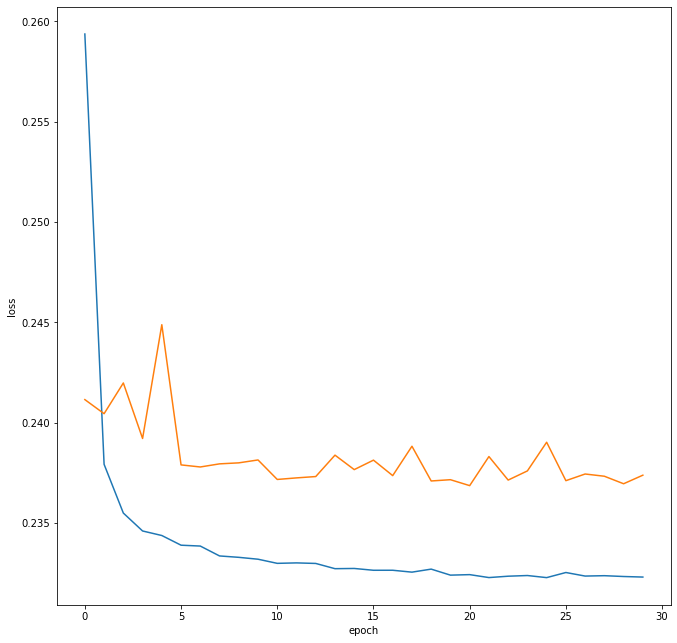

In [105]:
plt.figure(figsize=(11,11))
plt.plot(History_trace.history['loss'])
plt.plot(History_trace.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [110]:
#adding learning rate to model4 

model4=Sequential()
model4.add(layers.Dense(1000, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model4.add(Dropout(0.1))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dense(y.shape[1], activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam')
monitor= EarlyStopping(monitor='loss', min_delta=1e-7, patience=8, verbose=1)
History_trace=model4.fit(X_train,y_train,verbose=2, validation_split=0.30,callbacks=[monitor],epochs=17, batch_size=150)
pred4=model.predict(X_test)
pred4=np.argmax(pred4,axis=1)
y_compare4= np.argmax(X_test, axis=1)
score= accuracy_score(y_compare4, pred4)
model4.summary()
#print(pred4)
print('Accuracy:%.2f'%accuracy_score(y_compare4,pred4))

Epoch 1/17
1194/1194 - 5s - loss: 0.4790 - val_loss: 0.2806 - 5s/epoch - 4ms/step
Epoch 2/17
1194/1194 - 5s - loss: 0.2759 - val_loss: 0.2727 - 5s/epoch - 4ms/step
Epoch 3/17
1194/1194 - 5s - loss: 0.2728 - val_loss: 0.2728 - 5s/epoch - 5ms/step
Epoch 4/17
1194/1194 - 5s - loss: 0.2711 - val_loss: 0.2691 - 5s/epoch - 4ms/step
Epoch 5/17
1194/1194 - 5s - loss: 0.2696 - val_loss: 0.2680 - 5s/epoch - 4ms/step
Epoch 6/17
1194/1194 - 5s - loss: 0.2692 - val_loss: 0.2748 - 5s/epoch - 4ms/step
Epoch 7/17
1194/1194 - 5s - loss: 0.2687 - val_loss: 0.2675 - 5s/epoch - 4ms/step
Epoch 8/17
1194/1194 - 5s - loss: 0.2683 - val_loss: 0.2676 - 5s/epoch - 5ms/step
Epoch 9/17
1194/1194 - 5s - loss: 0.2684 - val_loss: 0.2692 - 5s/epoch - 4ms/step
Epoch 10/17
1194/1194 - 5s - loss: 0.2678 - val_loss: 0.2747 - 5s/epoch - 4ms/step
Epoch 11/17
1194/1194 - 5s - loss: 0.2675 - val_loss: 0.2701 - 5s/epoch - 4ms/step
Epoch 12/17
1194/1194 - 5s - loss: 0.2677 - val_loss: 0.2896 - 5s/epoch - 4ms/step
Epoch 13/17
1

Text(0, 0.5, 'loss')

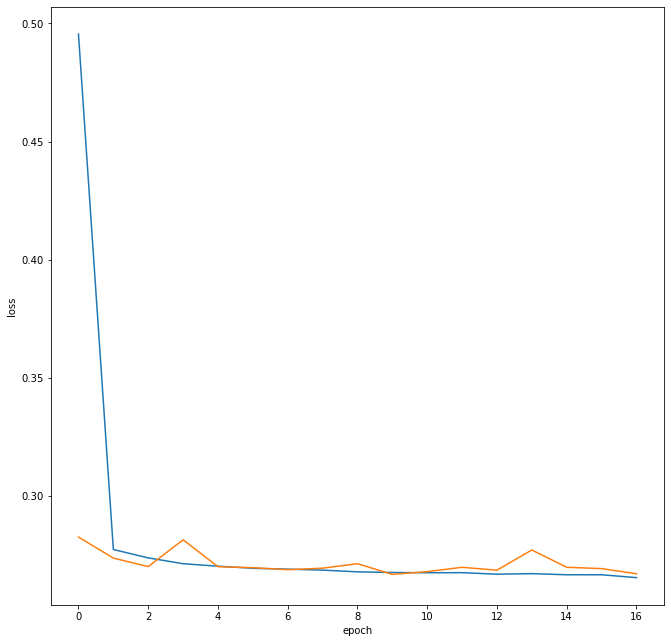

In [107]:
plt.figure(figsize=(11,11))
plt.plot(History_trace.history['loss'])
plt.plot(History_trace.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [111]:
#re-training model3 without dropout

model3=Sequential()
model3.add(layers.Dense(1000, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
#model.add(layer.Dense(1200, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(layer.Dense(1200, input_dim=X.shape[1], activation='relu',
#                        kernel_regularizer=regularizers.l2(0.01),active_kernel_regularizer=regularizers.l1(0.01),activation='relu')
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(y.shape[1], activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor=EarlyStopping(monitor='loss', min_delta=1e-7, patience=8, verbose=1)
History_trace=model3.fit(X_train,y_train,callbacks=[monitor], validation_split=0.3, verbose=0, epochs=15,batch_size=150)
pred3=model.predict(X_test)
pred3=np.argmax(pred3,axis=1)
y_out_compare3= np.argmax(y_test,axis=1)
#score= accuracy_score(y_out_compare,pred3,normalize=False)
model3.summary()
#print(y_out_compare3)
print('accuracy:%.2f'%accuracy_score(pred3,y_out_compare3))


1999/1999 [==============================] - 1s 653us/step
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 1000)              16000     
                                                                 
 dense_95 (Dense)            (None, 100)               100100    
                                                                 
 dense_96 (Dense)            (None, 50)                5050      
                                                                 
 dense_97 (Dense)            (None, 2)                 102       
                                                                 
Total params: 121,252
Trainable params: 121,252
Non-trainable params: 0
_________________________________________________________________
accuracy:0.91


Text(0, 0.5, 'loss')

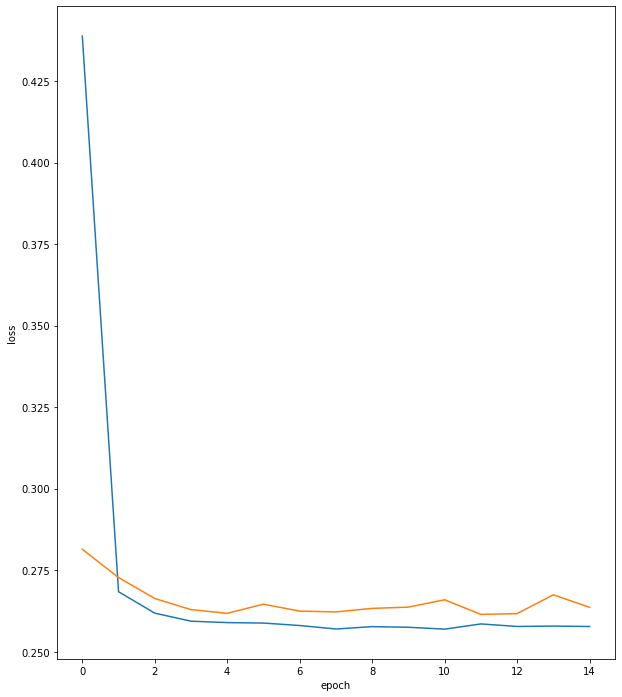

In [112]:
plt.figure(figsize=(10,12))
plt.plot(History_trace.history['loss'])
plt.plot(History_trace.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')